In [9]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(iris["data"],
                                                  iris["target"],
                                                  test_size=0.1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

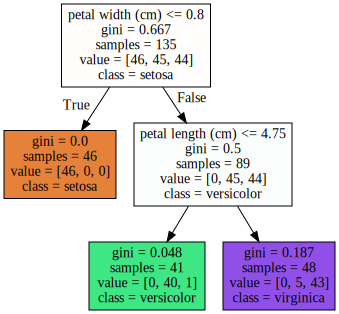

In [12]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf, out_file=None,
                   feature_names=iris["feature_names"],
                   class_names=iris["target_names"],filled=True)
graphviz.Source(g)

In [13]:
pre = clf.predict(x_test)
print("預測結果:", list(pre))
print("正確結果:", list(y_test))

from sklearn.metrics import accuracy_score
score = accuracy_score(clf.predict(x_test), y_test) # 預測結果計算分數
print("正確率:", score)

預測結果: [0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0]
正確結果: [0, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0]
正確率: 0.9333333333333333


In [15]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,pre) # 混淆矩陣
pd.DataFrame(cf)

0  1  2
0  4  0  0
1  0  4  1
2  0  0  6